In [1]:
# Change in the masses of the PBHs due to accretion in 
# Radiation Domination (RD) upto t_eq, post PBH formation.
# Here, m_i is the mass of the PBH when it gets formed at time t_i which is given as
# t_i = (4 * G * m_pbh)/(3 * c**3) with m_pbh ~ M_H_eq with 
# M_H_eq = 3e12 * (t/1e-23) # in units of kgs⁻¹, Horizon mass at z_eq, 
#  https://arxiv.org/pdf/1706.10288.pdf 

    


%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from module2 import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 


η_acc = 0.1      # Radiation Efficiency with standard value = 0.1.


bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

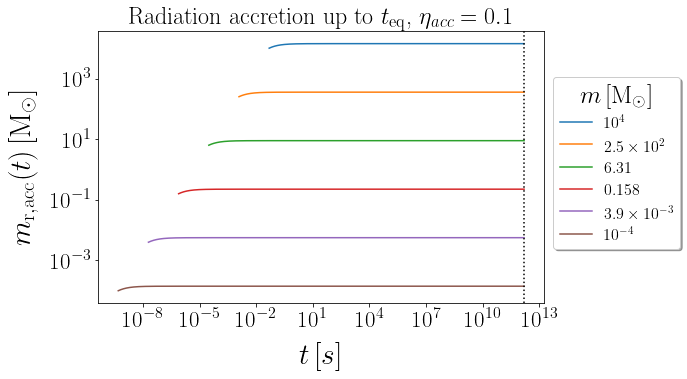

In [2]:
#Accretion of radiation around PBH in RD up to t_eq
# as per Eq. (9) of reference Nayak et. al (https://arxiv.org/pdf/1107.2025.pdf)
# Without an extra factor of 4 and including c_s = c/sqrt(3) with η_acc = 0.1.


def m_racc(m, t):
    c_s  = c/np.sqrt(3)
    k = ((4 * π * (G**2))/(c_s**3)) * (t_1**2) * ((t_1/t_2)**(-8/3)) * (np.exp(-4 * H_0 *(t_2 -t_0)))
    x = 1/t
    x_i = 1/t_i
    first_term  = k *  ρ_r0 *  (x - x_i) *  η_acc
    second_term = 1/m
    return (1/(first_term + second_term))
    

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    ax.loglog(t, m_racc(m, t)/M_solar, color = color)
    

plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m_\mathrm{r, acc}(t) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title(r'Radiation accretion up to $t_\mathrm{eq}$, $\eta_{acc} = 0.1$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

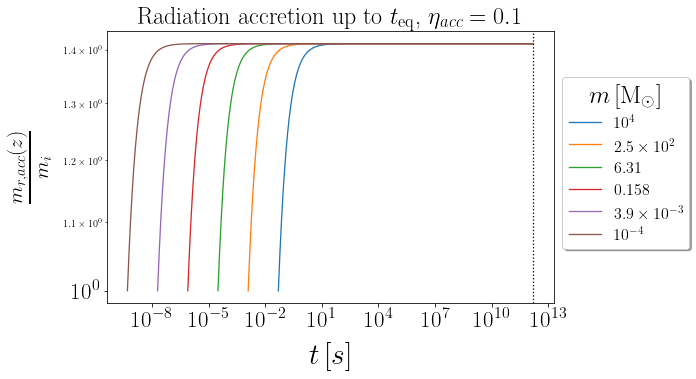

In [3]:
# Fractional change in the mass of the PBH due to radiation accretion upto t_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = ( G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000)  
    ax.loglog(t, ((m_racc(m, t))/m), color = color)
    
    
  
    
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\, [s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{m_{r, acc}(z)}{m_{i}} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

#plt.ylim(1e-5, 1)
plt.title('Radiation accretion up to $t_\mathrm{eq}$, $\eta_{acc} = 0.1$', fontsize = 24, pad = 8)
plt.savefig('raccΔ.pdf', bbox_inches = 'tight')
plt.show()

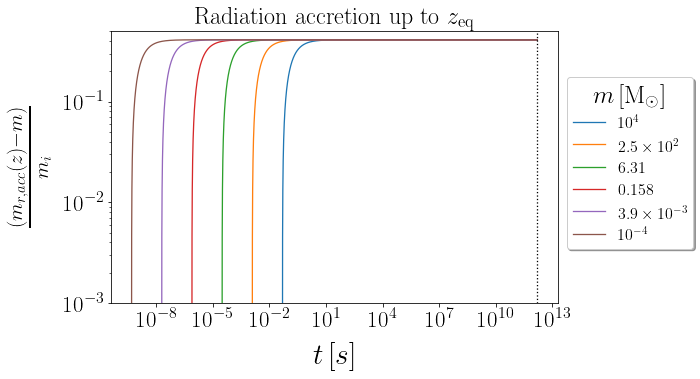

In [4]:
# Fractional change in the mass of the PBH due to radiation accretion upto t_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000) 
    ax.loglog(t, ((m_racc(m, t)- m)/m), color = color)
    
    
#print(np.max(((m_racc(m, t) - m)/m)))    
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\, [s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r,acc}(z) - m)}{m_{i}} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.ylim(1e-3, 0.5)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ_fractional.pdf', bbox_inches = 'tight')
plt.show()

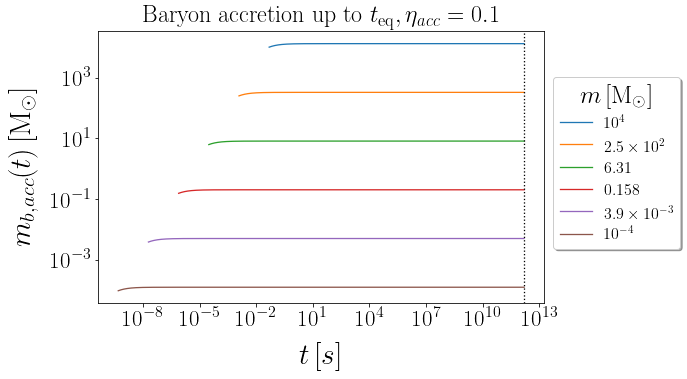

In [5]:
#Accretion of matter/gas/baryons around PBH in RD up to t_eq
# as per Eq. (14) of reference Nayak et. al (https://arxiv.org/pdf/1107.2025.pdf)
# Without an extra factor of 4 and including c_s = c/sqrt(3) with η_acc = 0.1.


def m_bacc(m, t):
    c_s  = c/np.sqrt(3)
    k = ((4 * π * (G**2))/(c_s**3)) * (t_2**2) * (np.exp(-3 * H_0 *(t_2 -t_0)))
    x = 1/t
    x_i = 1/t_i
    first_term  = k *  ρ_m0 *  (x - x_i) *  η_acc
    second_term = 1/m
    return (1/(first_term + second_term))
  
    
fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = ( G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    ax.loglog(t, m_bacc(m, t)/M_solar, color = color)
    

plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m_{b, acc}(t) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Baryon accretion up to $t_\mathrm{eq}, \eta_{acc} = 0.1$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

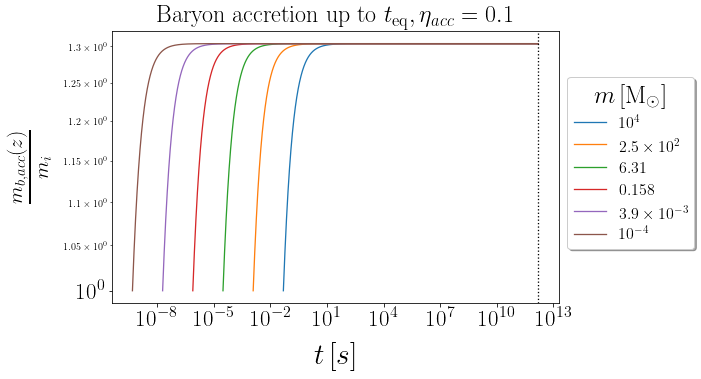

In [6]:
# Fractional change in the mass of the PBH due to baryon accretion upto t_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    ax.loglog(t, ((m_bacc(m, t))/m), color = color)
    
    
  
    
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\, [s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{m_{b,acc}(z) }{m_{i}} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

#plt.ylim(1e-5, 1)
plt.title('Baryon accretion up to $t_\mathrm{eq}, \eta_{acc} = 0.1$', fontsize = 24, pad = 8)
plt.savefig('baccΔ.pdf', bbox_inches = 'tight')
plt.show()

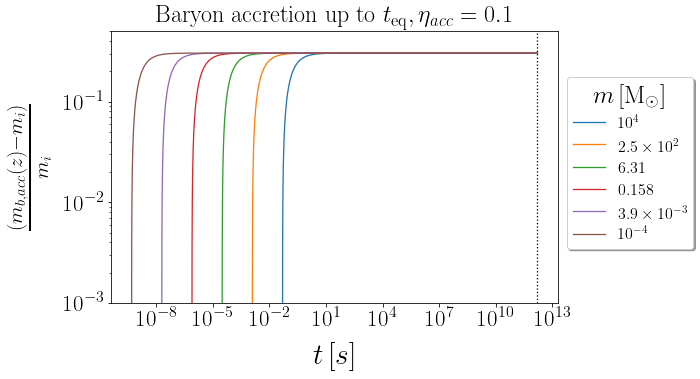

In [7]:
# Fractional change in the mass of the PBH due to baryon accretion upto t_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (G * m)/(c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    ax.loglog(t, ((m_bacc(m, t) - m)/m), color = color)
    
    
#print(np.max(((m_bacc(m, t) - m)/m))) 
    
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\, [s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b,acc}(z) - m_i) }{m_i} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.ylim(1e-3, 0.5)
plt.title('Baryon accretion up to $t_\mathrm{eq}, \eta_{acc} = 0.1$', fontsize = 24, pad = 8)
plt.savefig('baccΔ_fractional.pdf', bbox_inches = 'tight')
plt.show()